In [340]:
import os
import sys
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt
from Naive_DAE import Naive_DAE,Dropout_DAE

from load_data_fn import load_data,load_data_no_filter

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset
import AE_Stats

In [3]:
dt_loc = load_data_no_filter(1)

In [390]:
torch.mean(dt_loc[:,0:48])

tensor(5.7043)

In [232]:
arr = torch.load('1_1_thresh_sim')
for j in [2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20]:
    arr = torch.vstack([arr,torch.load(f'{j}_1_thresh_sim')])
    

In [391]:
torch.mean(arr[:,0:48])

tensor(47.7438, dtype=torch.float64)

# Sim Energy Histograms

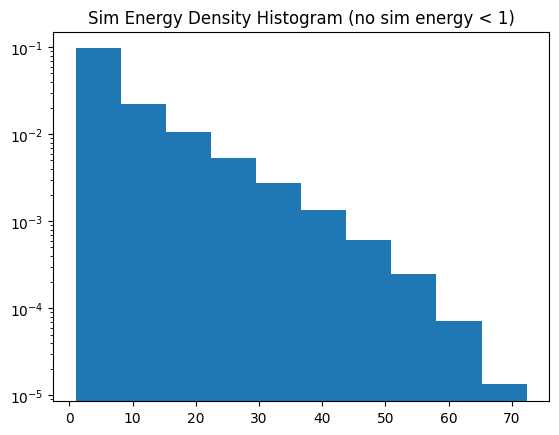

In [234]:
plt.title("Sim Energy Density Histogram (no sim energy < 1)")
plt.hist(arr[:,-4], log = True, density = True)
plt.show()

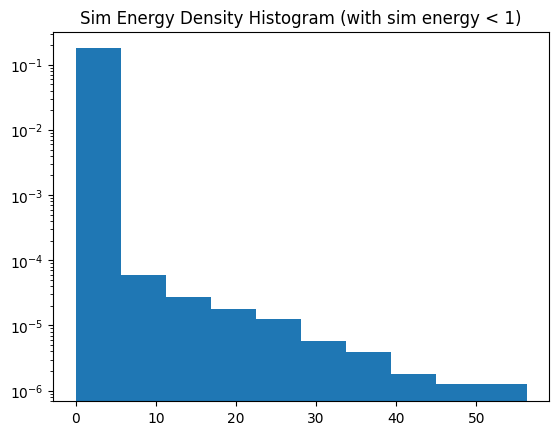

In [17]:
plt.title("Sim Energy Density Histogram (with sim energy < 1)")
plt.hist(dt_loc[0:1000000,-4],log = True, density = True)
plt.show()

# Distribution of CACLQ

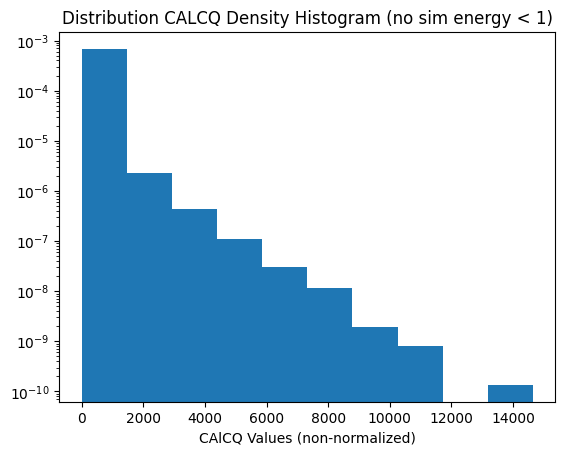

In [235]:
plt.title("Distribution CALCQ Density Histogram (no sim energy < 1)")
plt.hist(torch.flatten(arr[:,0:48]), log = True, density = True)
plt.xlabel('CAlCQ Values (non-normalized)')
plt.show()

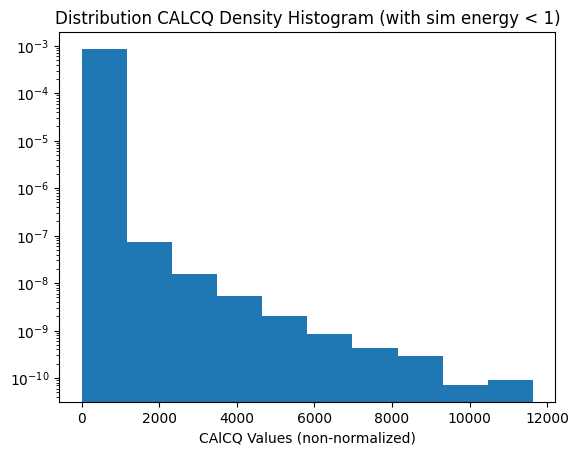

In [19]:
plt.title("Distribution CALCQ Density Histogram (with sim energy < 1)")
plt.hist(torch.flatten(dt_loc[0:1000000,0:48]), log = True, density = True)
plt.xlabel('CAlCQ Values (non-normalized)')
plt.show()

# Mean Wafer

In [20]:
dt_sum = torch.sum(dt_loc[:,0:48],dim = 1)

In [236]:
arr_sum =torch.sum(arr[:,0:48],dim = 1)

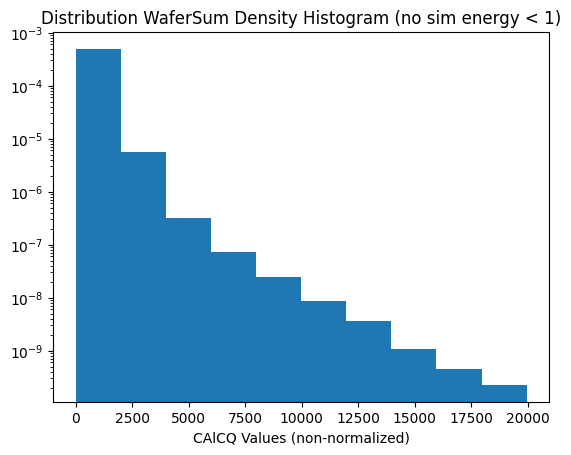

In [237]:
plt.title("Distribution WaferSum Density Histogram (no sim energy < 1)")
plt.hist(dt_sum, log = True, density = True)
plt.xlabel('CAlCQ Values (non-normalized)')
plt.show()

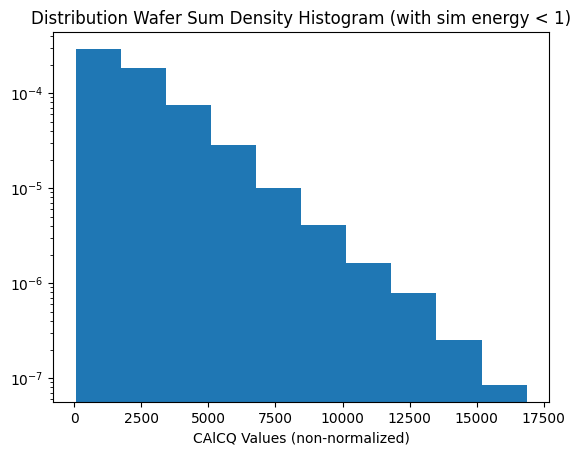

In [238]:
plt.title("Distribution Wafer Sum Density Histogram (with sim energy < 1)")
plt.hist(arr_sum, log = True, density = True)
plt.xlabel('CAlCQ Values (non-normalized)')
plt.show()

# Sum Wafer Vs Sim Energy

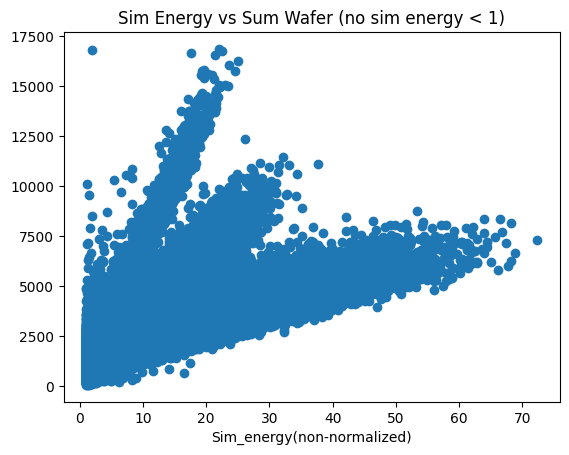

In [239]:
plt.title("Sim Energy vs Sum Wafer (no sim energy < 1)")
plt.scatter(arr[:,-4],arr_sum)
plt.xlabel('Sim_energy(non-normalized)')
plt.show()

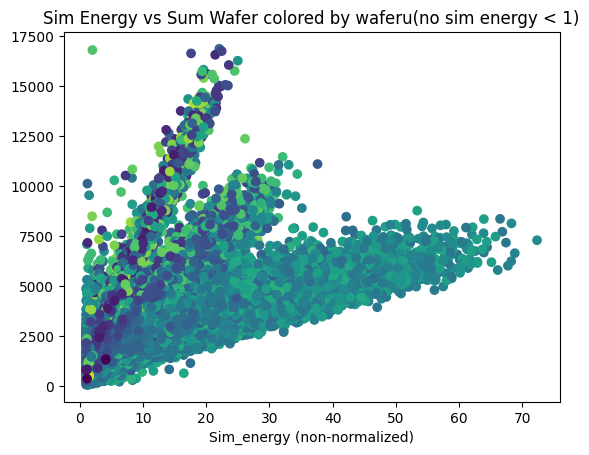

In [240]:
plt.title("Sim Energy vs Sum Wafer colored by waferu(no sim energy < 1)")
plt.scatter(arr[:,-4],arr_sum, c = arr[:,-6])
plt.xlabel('Sim_energy (non-normalized)')
plt.show()

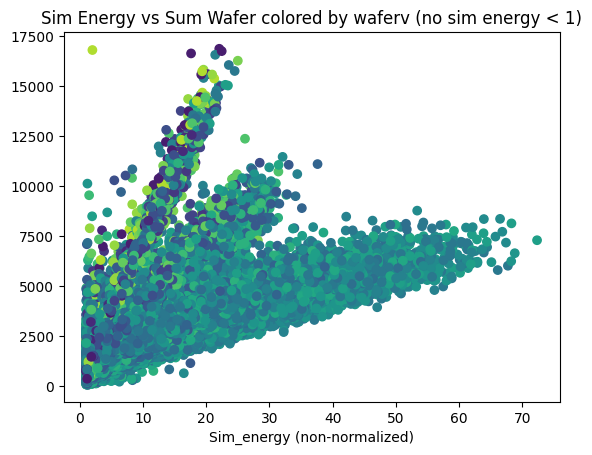

In [241]:
plt.title("Sim Energy vs Sum Wafer colored by waferv (no sim energy < 1)")
plt.scatter(arr[:,-4],arr_sum, c = arr[:,-5])
plt.xlabel('Sim_energy (non-normalized)')
plt.show()

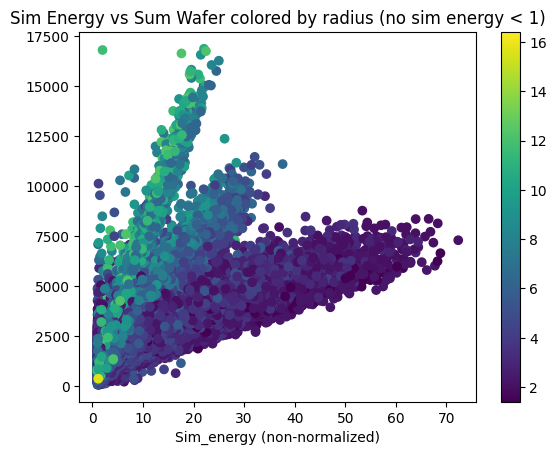

In [242]:

plt.title("Sim Energy vs Sum Wafer colored by radius (no sim energy < 1)")
plt.scatter(arr[:,-4],arr_sum, c = np.sqrt(arr[:,-6]**2+arr[:,-5]**2))
plt.colorbar()
plt.xlabel('Sim_energy (non-normalized)')
plt.show()

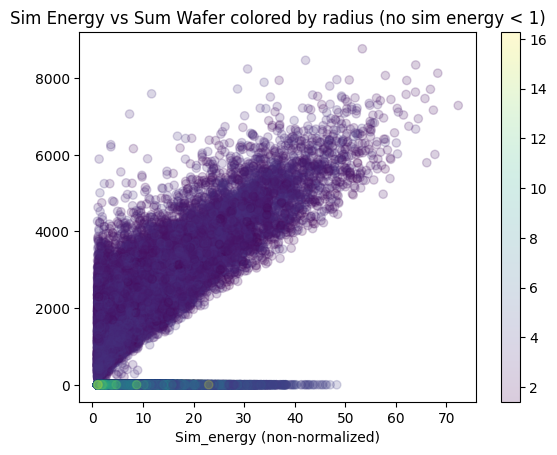

In [137]:
weights = []
for rad in r:
    if rad < 0: 
        weights.append(0)
    elif rad <4:
        weights.append(1)
    elif rad < 5:
        weights.append(0)
    elif rad< 11: 
        weights.append(0)
    else:
        weights.append(0)
weights = torch.tensor(weights)
plt.title("Sim Energy vs Sum Wafer colored by radius (no sim energy < 1)")
plt.scatter(arr[:,-4],arr_sum*weights, c = np.sqrt(arr[:,-6]**2+arr[:,-5]**2),alpha = 0.2)
plt.colorbar()
plt.xlabel('Sim_energy (non-normalized)')
plt.show()

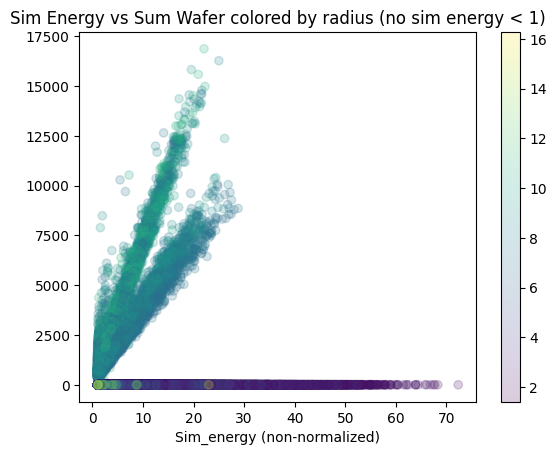

In [143]:
weights = []
for rad in r:
    if rad < 0: 
        weights.append(0)
    elif rad <6.5:
        weights.append(0)
  
    elif rad< 11: 
        weights.append(1)
    else:
        weights.append(0)
weights = torch.tensor(weights)
plt.title("Sim Energy vs Sum Wafer colored by radius (no sim energy < 1)")
plt.scatter(arr[:,-4],arr_sum*weights, c = np.sqrt(arr[:,-6]**2+arr[:,-5]**2),alpha = 0.2)
plt.colorbar()
plt.xlabel('Sim_energy (non-normalized)')
plt.show()

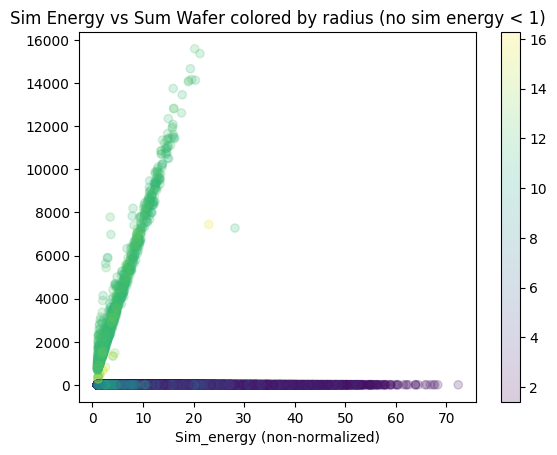

In [145]:
weights = []
for rad in r:
    if rad < 0: 
        weights.append(0)
    elif rad <6.5:
        weights.append(0)
    elif rad< 11: 
        weights.append(0)
    else:
        weights.append(1)
weights = torch.tensor(weights)
plt.title("Sim Energy vs Sum Wafer colored by radius (no sim energy < 1)")
plt.scatter(arr[:,-4],arr_sum*weights, c = np.sqrt(arr[:,-6]**2+arr[:,-5]**2),alpha = 0.2)
plt.colorbar()
plt.xlabel('Sim_energy (non-normalized)')
plt.show()

In [119]:
w1 = 120/200
w3 = 300/200

In [102]:
r = (arr[:,-6]**2+arr[:,-5]**2)**(0.5)

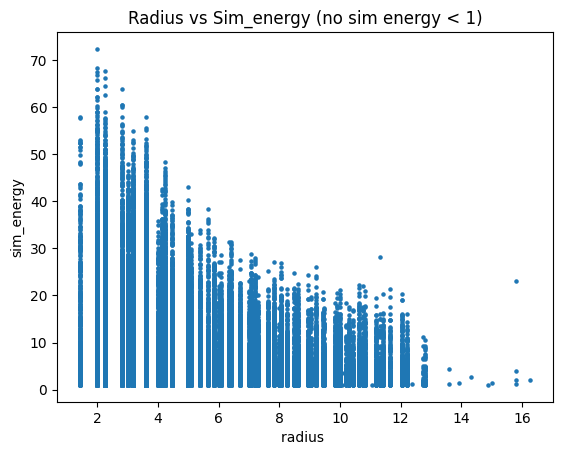

In [96]:
plt.title("Radius vs Sim_energy (no sim energy < 1)")
plt.scatter((arr[:,-6]**2+arr[:,-5]**2)**(0.5),arr[:,-4], s=5)
plt.xlabel('radius ')
plt.ylabel('sim_energy')
plt.show()

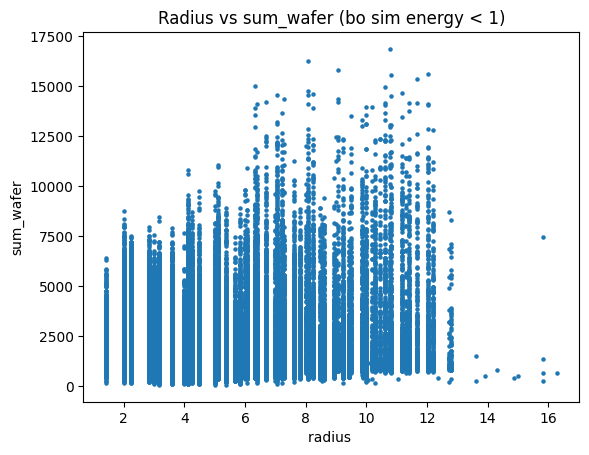

In [97]:
plt.title("Radius vs sum_wafer (bo sim energy < 1)")
plt.scatter((arr[:,-6]**2+arr[:,-5]**2)**(0.5),arr_sum, s=5)
plt.xlabel('radius ')
plt.ylabel('sum_wafer')
plt.show()

KeyboardInterrupt: 

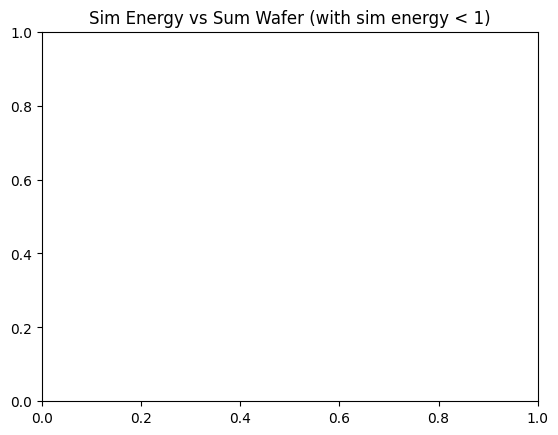

In [84]:
plt.title("Sim Energy vs Sum Wafer (with sim energy < 1)")
plt.scatter(dt_loc[:,-4],dt_sum)
plt.xlabel('sim_energy (non-normalized)')
plt.show()

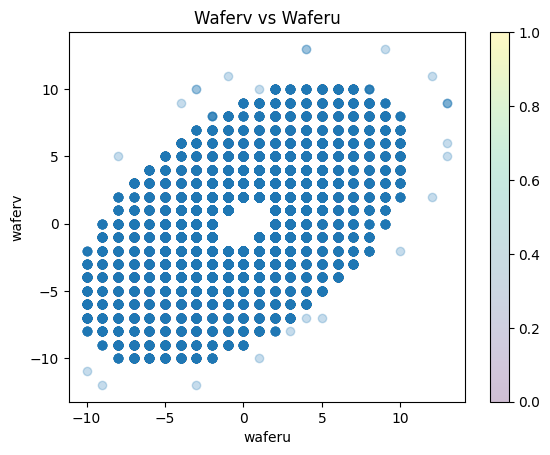

In [231]:
arr[0,-6:-4] #waveru,waferv
plt.title("Waferv vs Waferu")
plt.scatter(arr[:,-6], arr[:,-5], alpha = 0.25)
plt.colorbar()
plt.xlabel('waferu')
plt.ylabel('waferv')
plt.show()

In [ ]:
# 23 by 25

In [192]:
torch.min(arr[:,-5])

tensor(-12., dtype=torch.float64)

In [243]:
storage = np.zeros([23,25,3])
i = 0
for a in arr:
    storage[int(a[-6].detach().numpy().item()+9),int(a[-5].detach().numpy().item()+11)] =  [storage[int(a[-6].detach().numpy().item()+9),int(a[-5].detach().numpy().item()+11)][0]+arr_sum[i], storage[int(a[-6].detach().numpy().item()+9),int(a[-5].detach().numpy().item()+11)][1]+arr[i,-4],storage[int(a[-6].detach().numpy().item()+9),int(a[-5].detach().numpy().item()+11)][2]+1]
    i = i +1   
    
            

In [252]:
mean_storage = storage[:,:,0:2]/torch.unsqueeze(torch.tensor(storage[:,:,2]),dim=2)
mean_storage = torch.nan_to_num(torch.tensor(mean_storage))

/tmp/ipykernel_43132/3880981147.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean_storage = torch.nan_to_num(torch.tensor(mean_storage))


In [259]:
x = []
y = []
val = []
sim_val = []
for i in range(len(mean_storage)):
    for j in range(len(mean_storage[0])):
        
        
        if mean_storage[i,j,0].item() != 0.0:
            x.append(i)
            y.append(j)
            val.append(mean_storage[i,j,0].item())
            sim_val.append(mean_storage[i,j,1].item())
            

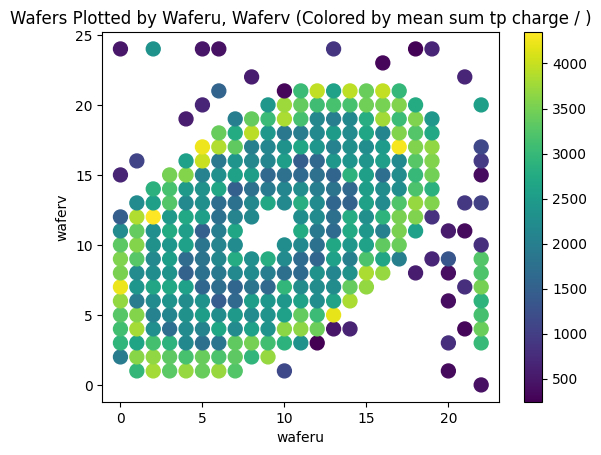

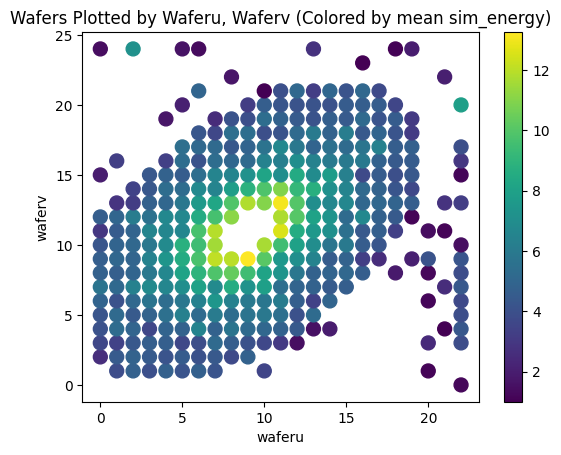

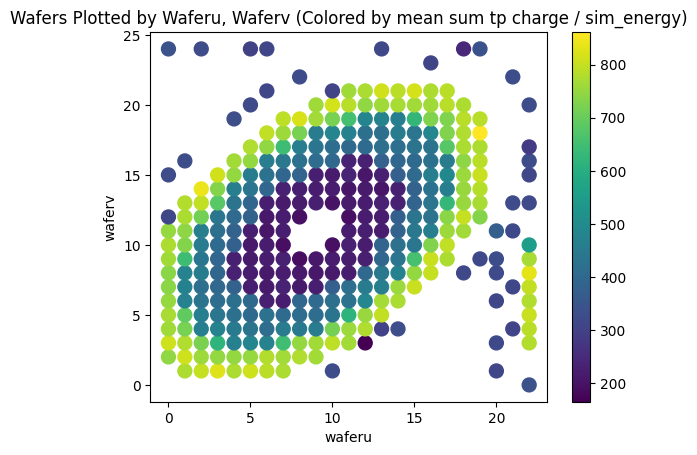

In [268]:
plt.title('Wafers Plotted by Waferu, Waferv (Colored by mean sum tp charge / )')
plt.scatter(x,y, c = val,s=100)
plt.xlabel('waferu')
plt.ylabel('waferv')
plt.colorbar()
plt.show()


'''
ADD SIM ENERGY COLORING TO DIF PLOT

'''
plt.title('Wafers Plotted by Waferu, Waferv (Colored by mean sim_energy)')
plt.scatter(x,y, c = sim_val,s=100)
plt.xlabel('waferu')
plt.ylabel('waferv')
plt.colorbar()
plt.show()

plt.title('Wafers Plotted by Waferu, Waferv (Colored by mean sum tp charge / sim_energy)')
plt.scatter(x,y, c = np.array(val)/np.array(sim_val),s=100)
plt.xlabel('waferu')
plt.ylabel('waferv')
plt.colorbar()
plt.show()

In [270]:
slope =np.array(val)/np.array(sim_val)

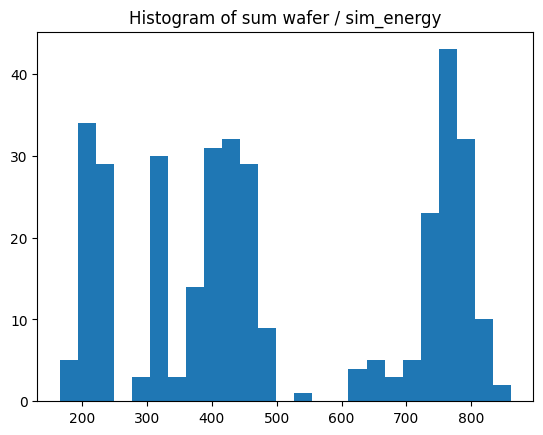

In [383]:
plt.title("Histogram of sum wafer / sim_energy")
plt.hist(slope,bins = 25)
plt.show()

In [384]:
indicator = []
for s in slope:
    if s < 350:
        indicator.append(1)
    elif s <600:
        indicator.append(2)
    else:
        indicator.append(3)

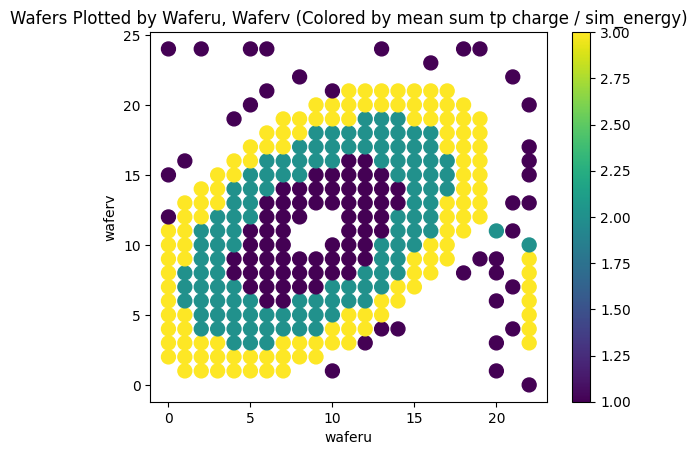

In [385]:
plt.title('Wafers Plotted by Waferu, Waferv (Colored by mean sum tp charge / sim_energy)')
plt.scatter(x,y, c = indicator,s=100)
plt.xlabel('waferu')
plt.ylabel('waferv')
plt.colorbar()
plt.show()

In [290]:
labeled_wafers = torch.hstack([torch.unsqueeze(torch.tensor(x),dim=1),torch.unsqueeze(torch.tensor(y),dim=1),torch.unsqueeze(torch.tensor(indicator),dim=1)])

# Spltting data based on Wafer type

In [348]:
helping = np.zeros([50,50])
helping[x,y] = indicator
dt_1 = []
dt_2 = []
dt_3 = []

for a in arr:
    pos = [a[-6]+12,a[-5]+12]
    lab = helping[int((a[-6]).item())+12,int((a[-5]).item())+12]
    if lab ==1: 
        dt_1.append(a)
    elif lab ==2: 
        dt_2.append(a)
    else:
        dt_3.append(a)
    
dt_1 = torch.vstack(dt_1).float()
dt_2 = torch.vstack(dt_2).float()   
dt_3 = torch.vstack(dt_3).float()   

In [398]:
dt_1[:,0:48] = (dt_1[:,0:48] - torch.mean(dt_1[:,0:48]))/torch.std(dt_1[:,0:48])
dt_2[:,0:48] = (dt_2[:,0:48] - torch.mean(dt_2[:,0:48]))/torch.std(dt_2[:,0:48])
dt_3[:,0:48] = (dt_3[:,0:48] - torch.mean(dt_3[:,0:48]))/torch.std(dt_3[:,0:48])

In [407]:
len(dt_1)

37495

In [408]:
len(dt_2)

40934

In [409]:
len(dt_3)

26776

In [410]:
size_train =25000
size_test = 10000
train_loc = dt_1[0:size_train]
test_loc = dt_1[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=100,
    shuffle=False
)

test_loc_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=100,
    shuffle=False
)

train = dt_1[0:size_train,0:48]
test = dt_1[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=100,
    shuffle=False
)

test_d1_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=100,
    shuffle=False
)

In [411]:
size_train =25000
size_test = 15000
train_loc = dt_2[0:size_train]
test_loc = dt_2[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=100,
    shuffle=False
)

test_loc_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=100,
    shuffle=False
)

train = dt_2[0:size_train,0:48]
test = dt_2[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=100,
    shuffle=False
)

test_d2_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=100,
    shuffle=False
)

In [412]:
size_train =15000
size_test = 10000
train_loc = dt_3[0:size_train]
test_loc = dt_3[-size_test:]
# train = torch.vstack([train,largest[0:1000]] )
train_loc=train_loc[torch.randperm(train_loc.size()[0])]
test_loc=test_loc[torch.randperm(test_loc.size()[0])]
train_loc_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(train_loc)),
    batch_size=100,
    shuffle=False
)

test_loc_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(test_loc)),
    batch_size=100,
    shuffle=False
)

train = dt_3[0:size_train,0:48]
test = dt_3[-size_test:,0:48]
# train = torch.vstack([train,largest[0:1000]] )
train=train[torch.randperm(train.size()[0])]
test=test[torch.randperm(test.size()[0])]
train_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(train)),
    batch_size=100,
    shuffle=False
)

test_d3_flat = DataLoader(
    TensorDataset(torch.Tensor(test)),
    batch_size=100,
    shuffle=False
)

In [413]:
num_epochs = 50
lr = 0.0045
loss = AE_MSE

Epoch 0, lr 0.0045
Epoch 0: Train 27.246749641418457, Test 19.312700271606445
Epoch 1, lr 0.0045
Epoch 1: Train 11.641025434494018, Test 10.240415573120117
Epoch 2, lr 0.0045
Epoch 2: Train 7.043571866989136, Test 8.214481353759766
Epoch 3, lr 0.0045
Epoch 3: Train 6.116524152755737, Test 7.229689121246338
Epoch 4, lr 0.0045
Epoch 4: Train 5.96299342918396, Test 7.178325653076172
Epoch 5, lr 0.0045
Epoch 5: Train 5.444466869354248, Test 6.824062347412109
Epoch 6, lr 0.0045
Epoch 6: Train 5.3429696073532105, Test 6.719608783721924
Epoch 7, lr 0.0045
Epoch 7: Train 5.26396464920044, Test 6.5327582359313965
Epoch 8, lr 0.0045
Epoch 8: Train 5.0986315469741825, Test 6.562915802001953
Epoch 9, lr 0.0045
Epoch 9: Train 5.235205976486206, Test 6.846513271331787
Epoch 10, lr 0.0045
Epoch 10: Train 4.935111995697022, Test 6.2892746925354
Epoch 11, lr 0.0045
Epoch 11: Train 4.816386059761047, Test 6.022502422332764
Epoch 12, lr 0.0045
Epoch 12: Train 4.708065102577209, Test 5.794323444366455
Epo

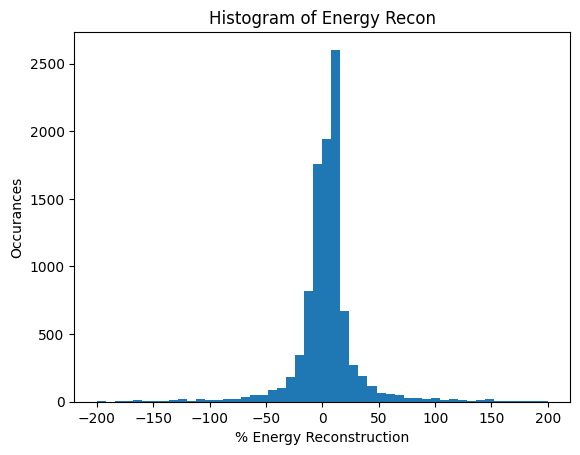

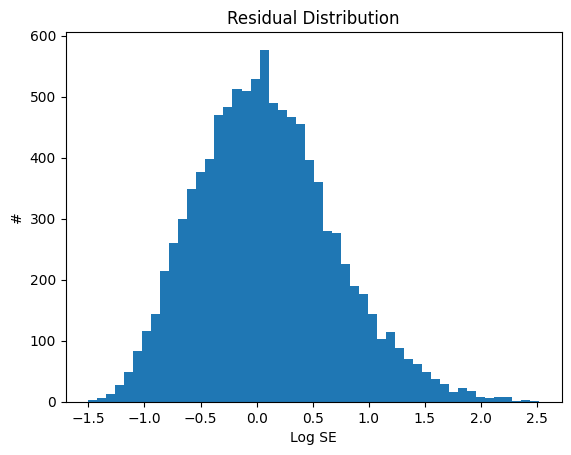

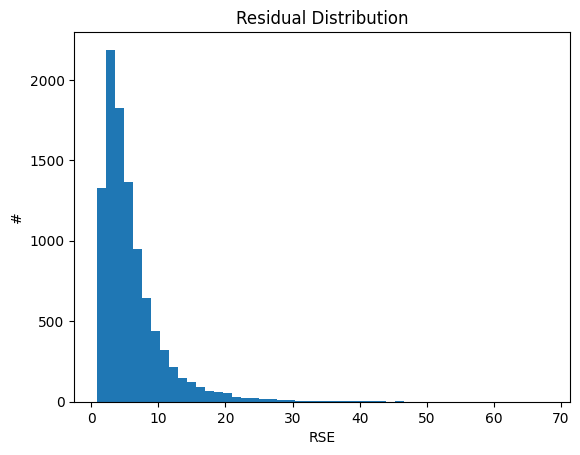

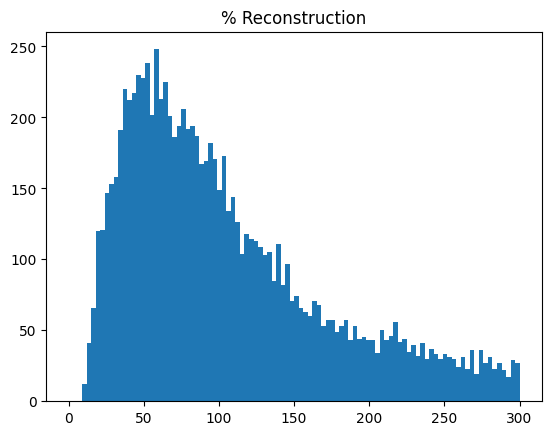

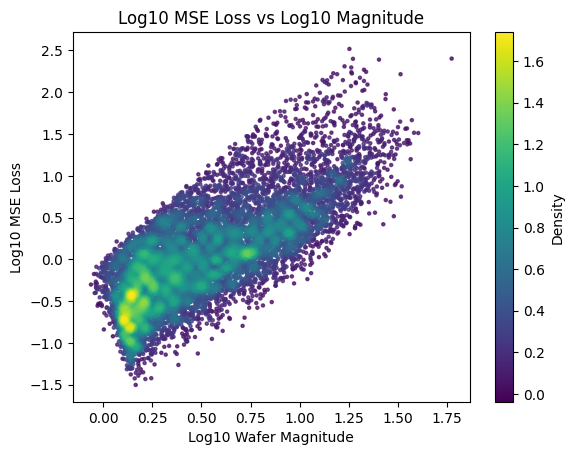

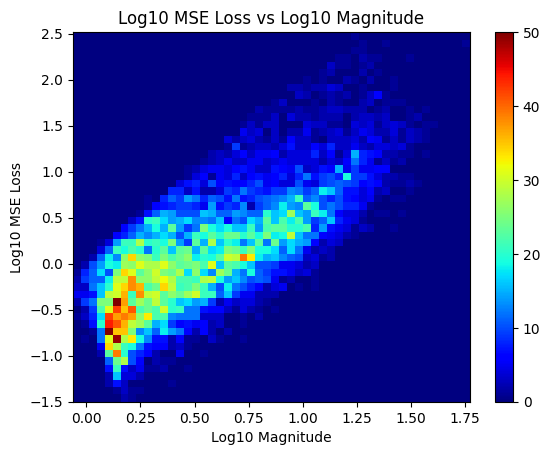

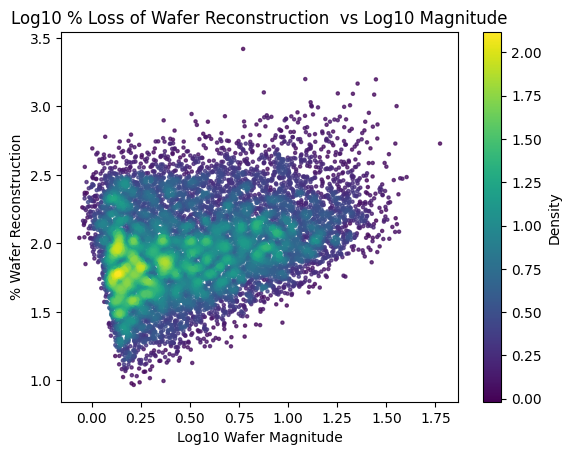

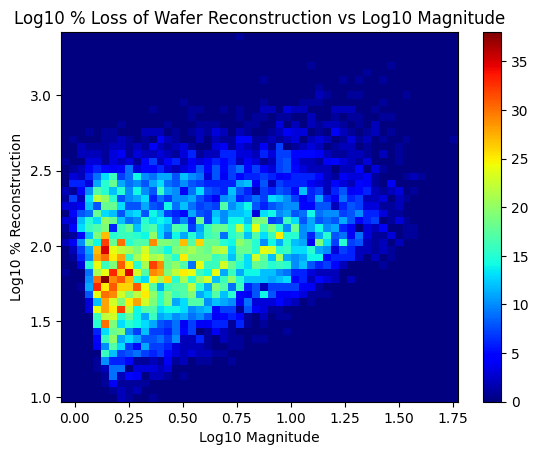

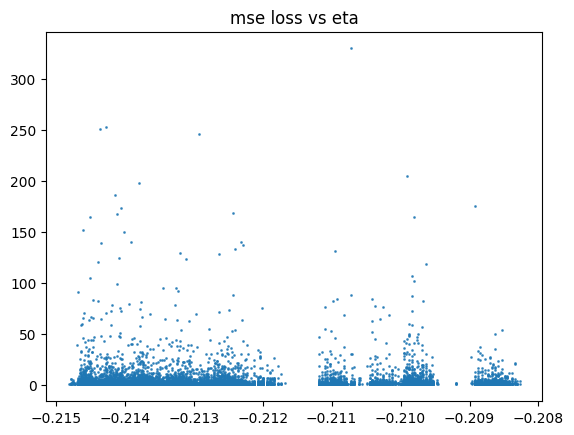

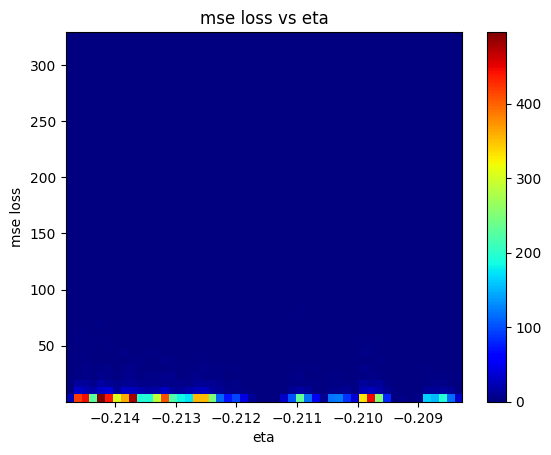

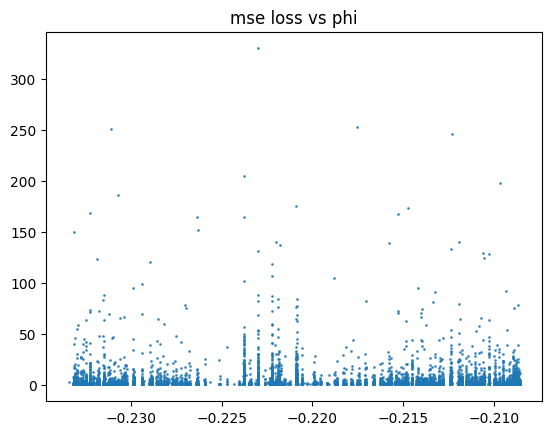

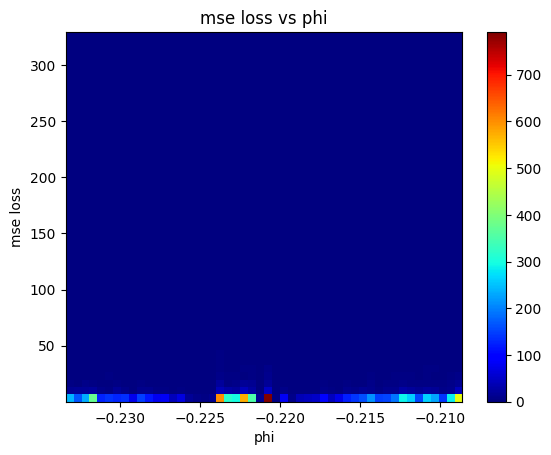

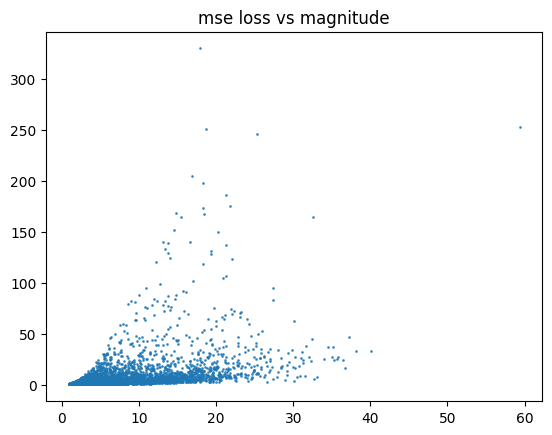

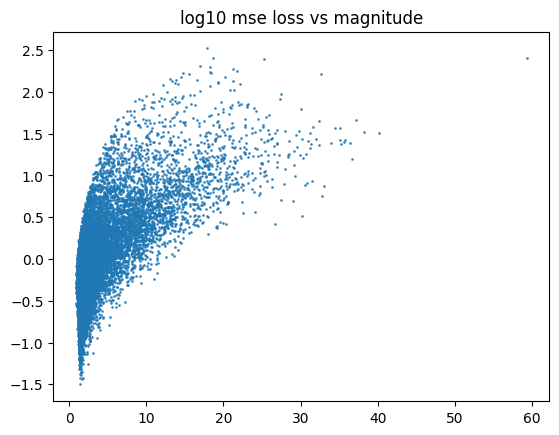

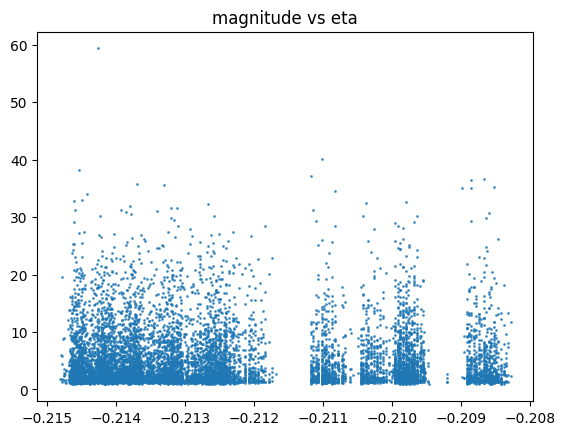

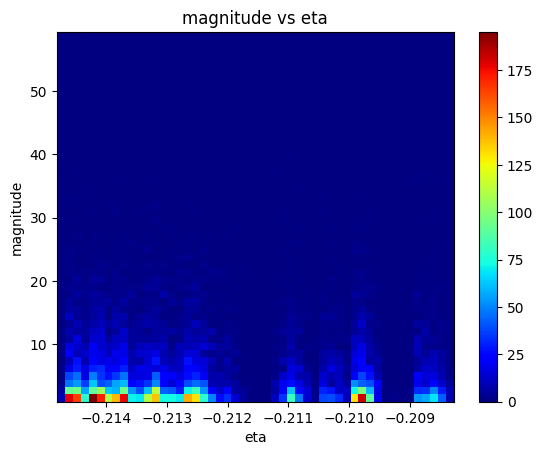

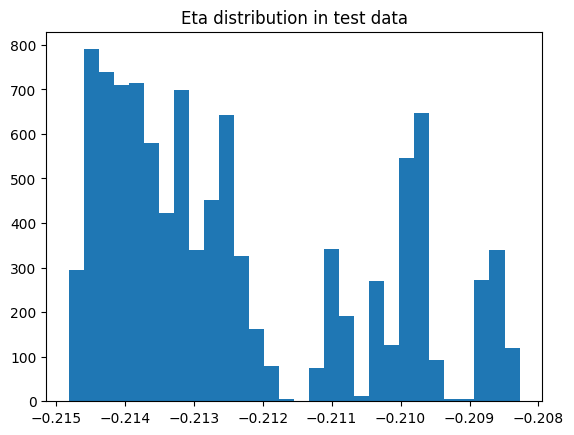

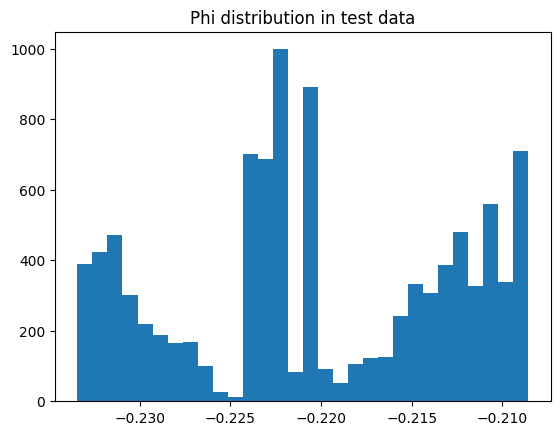

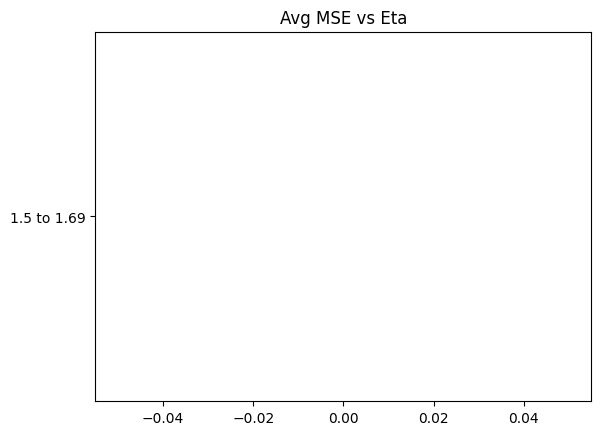

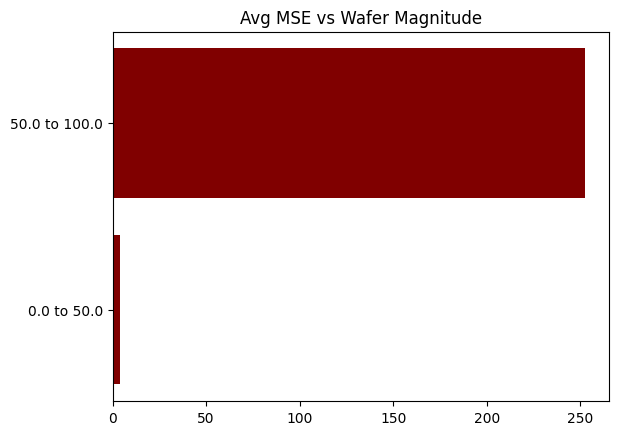

tensor([[-0.2145, -0.2178,  1.6294,  0.2748,  2.2666],
        [-0.2137, -0.2327,  2.6502,  7.3294,  8.7983],
        [-0.2132, -0.2099,  5.0999,  9.9924, 12.9212],
        ...,
        [-0.2131, -0.2312,  2.8470,  5.2663,  8.9657],
        [-0.2134, -0.2288,  2.0111,  3.5162,  8.0147],
        [-0.2144, -0.2140,  1.6086,  0.1721,  1.7163]], grad_fn=<CatBackward0>)

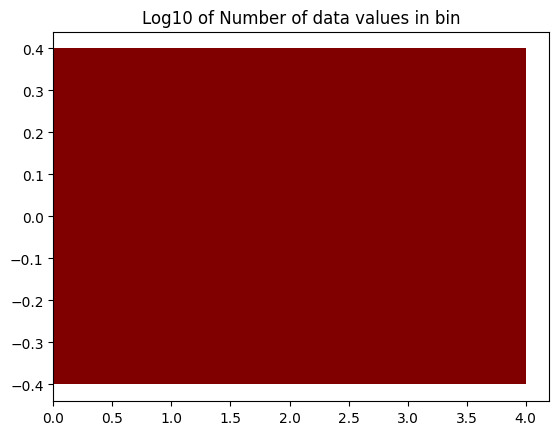

In [414]:
# fine-tune autoencoder
#batch 500


model_1 = Naive_DAE([48,250,100,16])

optimizer = optim.Adam(model_1.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d1_flat):
        model_1.train()
        data = data_list[0]
        v_pred = model_1(data)
        
        batch_loss = loss(data, v_pred) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_1[-size_test:,0:48]
    model_1.eval()
    test_pred = model_1(data_test)
    batch_test = loss(data_test, test_pred)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_1.eval()
AE_Stats.gen_all_stats(model_1(test),test,test_loc)


Epoch 0, lr 0.0045
Epoch 0: Train 31.137620635986327, Test 23.778642654418945
Epoch 1, lr 0.0045
Epoch 1: Train 16.131015537261963, Test 17.178497314453125
Epoch 2, lr 0.0045
Epoch 2: Train 11.449250129699706, Test 12.623054504394531
Epoch 3, lr 0.0045
Epoch 3: Train 9.17110644340515, Test 10.245161056518555
Epoch 4, lr 0.0045
Epoch 4: Train 8.230367437362672, Test 8.55884838104248
Epoch 5, lr 0.0045
Epoch 5: Train 7.494362791061401, Test 8.86664867401123
Epoch 6, lr 0.0045
Epoch 6: Train 7.126999865531921, Test 8.701059341430664
Epoch 7, lr 0.0045
Epoch 7: Train 6.840270359992981, Test 7.957334518432617
Epoch 8, lr 0.0045
Epoch 8: Train 6.652158643722534, Test 7.669154644012451
Epoch 9, lr 0.0045
Epoch 9: Train 6.4444558124542235, Test 7.5871052742004395
Epoch 10, lr 0.0045
Epoch 10: Train 6.3800562448501585, Test 7.530479907989502
Epoch 11, lr 0.0045
Epoch 11: Train 6.294072288513184, Test 7.503624439239502
Epoch 12, lr 0.0045
Epoch 12: Train 6.3089294519424435, Test 7.02224588394165

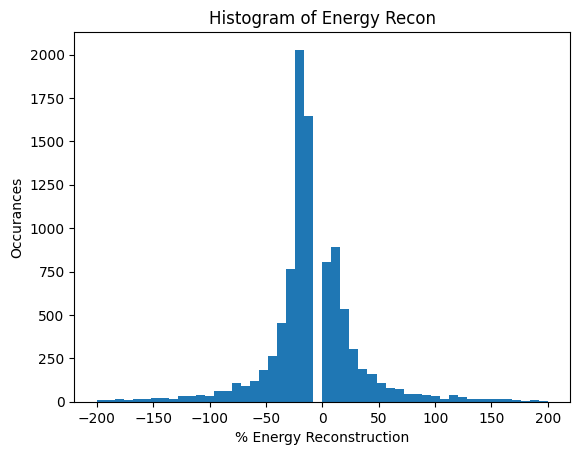

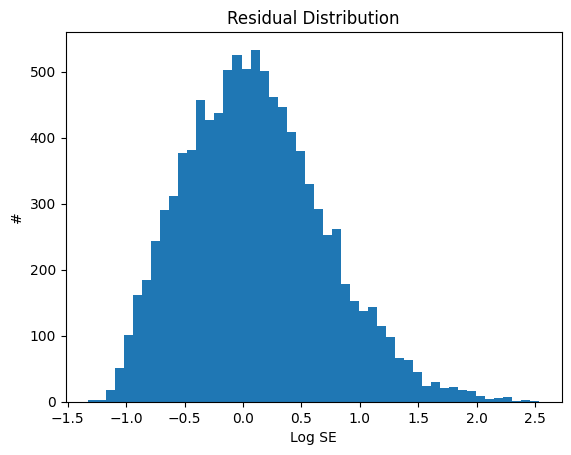

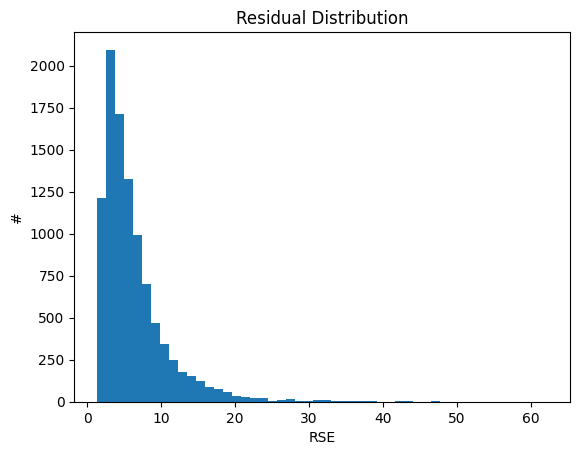

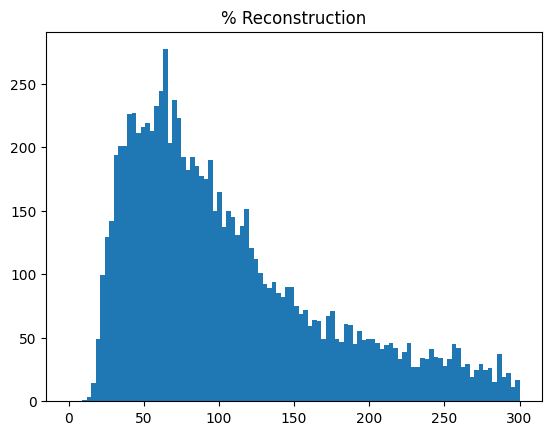

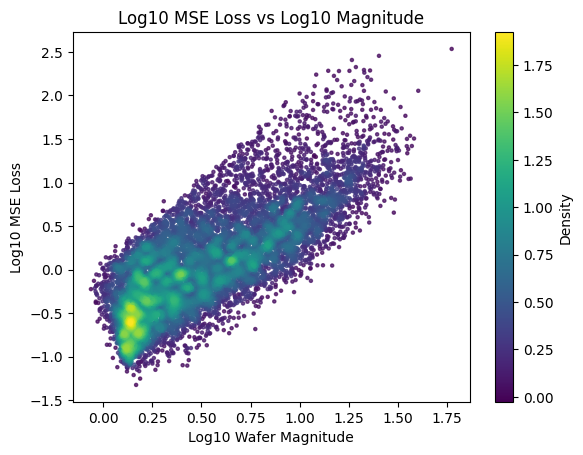

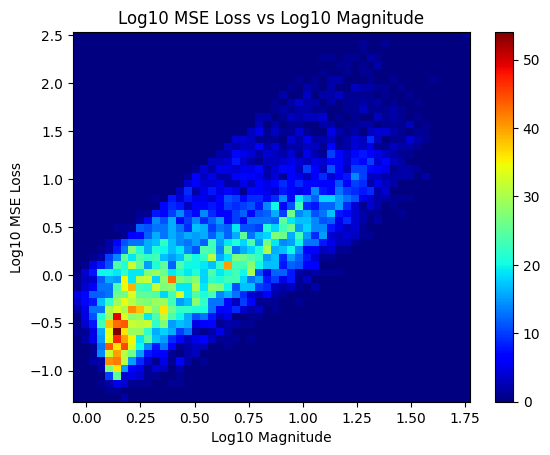

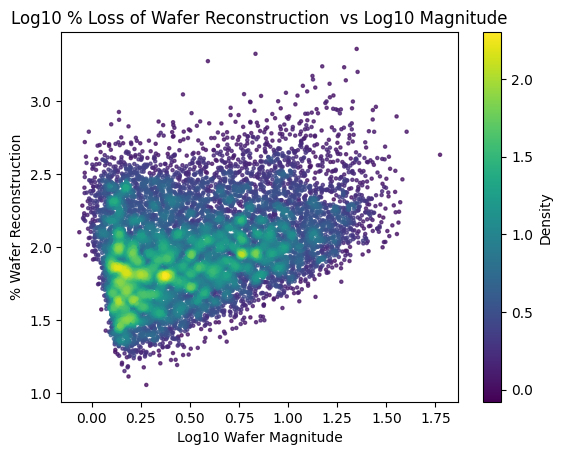

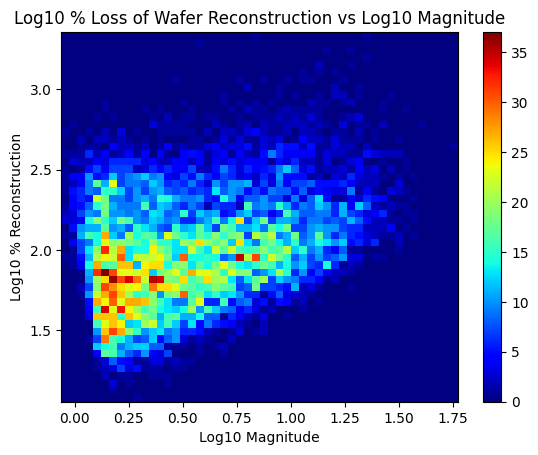

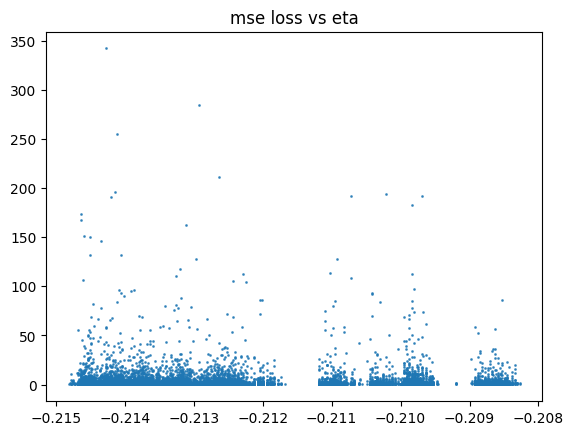

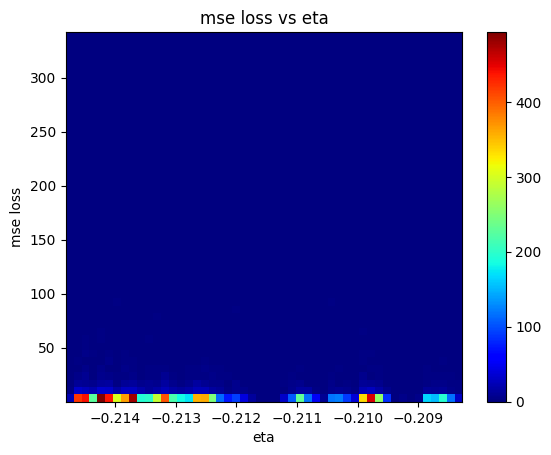

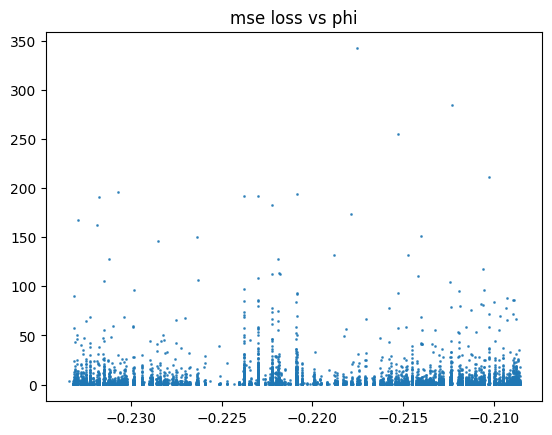

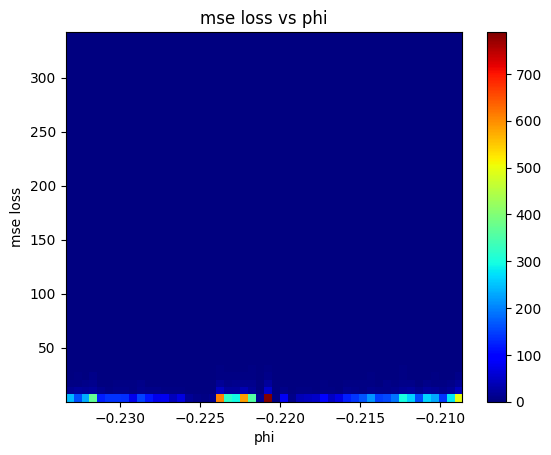

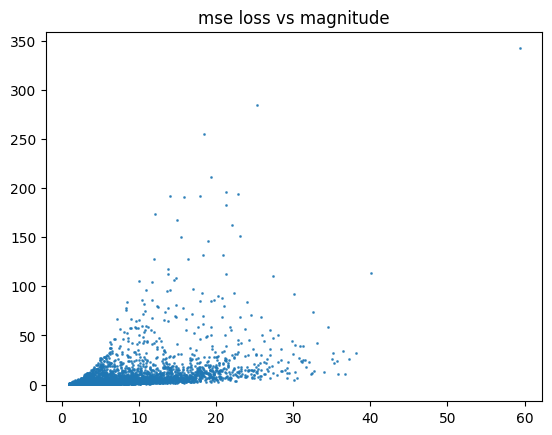

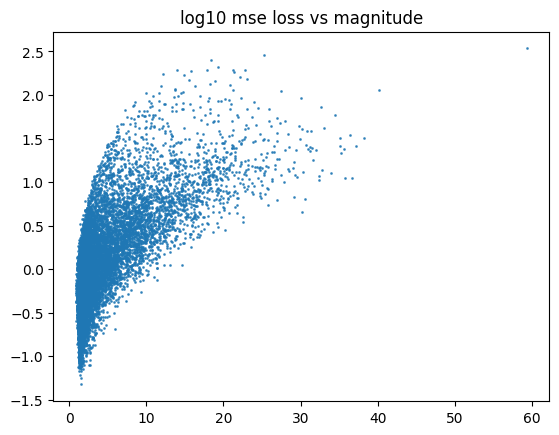

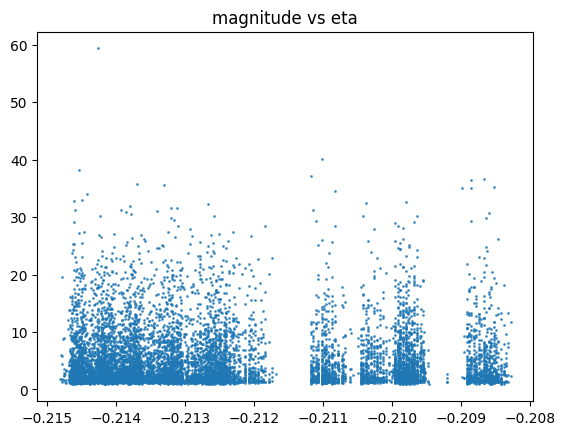

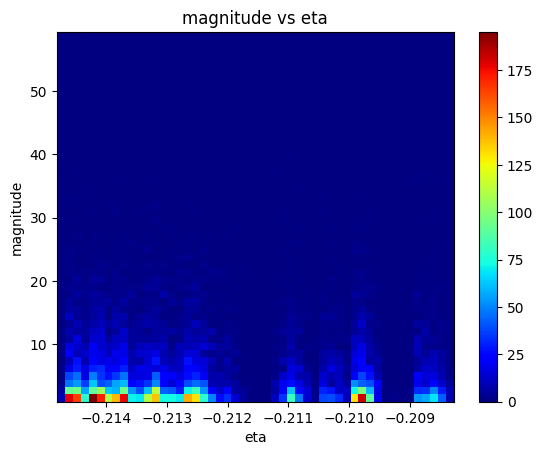

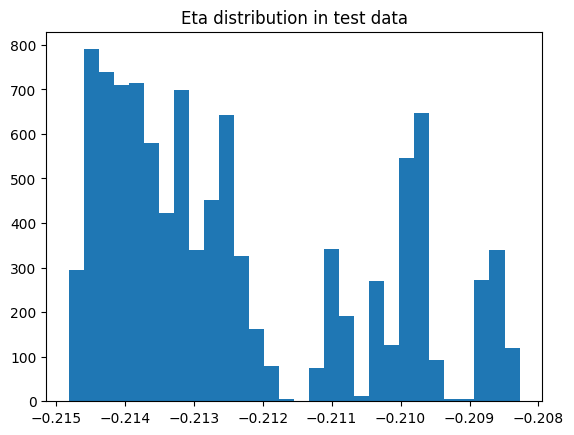

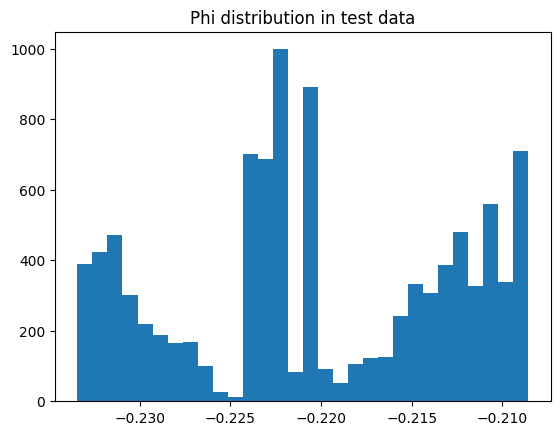

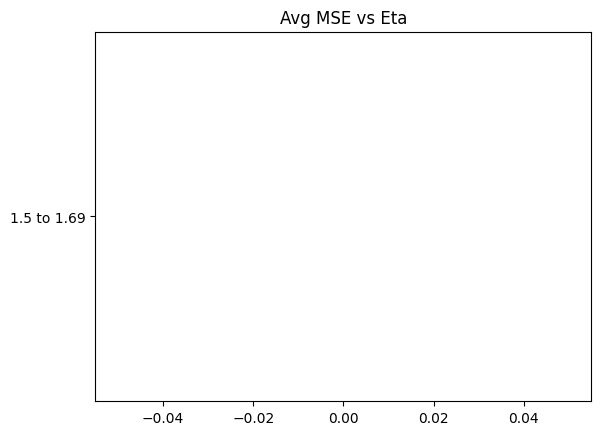

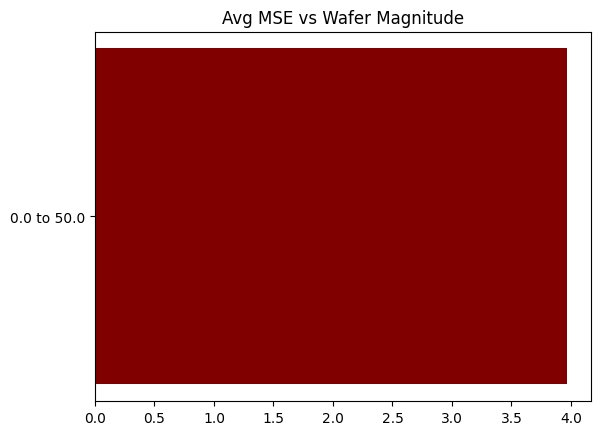

tensor([[-0.2145, -0.2178,  1.6294,  0.1990,  2.4421],
        [-0.2137, -0.2327,  2.6502,  4.6308,  7.9561],
        [-0.2132, -0.2099,  5.0999, 18.2581, 17.3919],
        ...,
        [-0.2131, -0.2312,  2.8470,  7.6390,  9.8503],
        [-0.2134, -0.2288,  2.0111,  3.2186,  6.7942],
        [-0.2144, -0.2140,  1.6086,  0.2030,  2.6155]], grad_fn=<CatBackward0>)

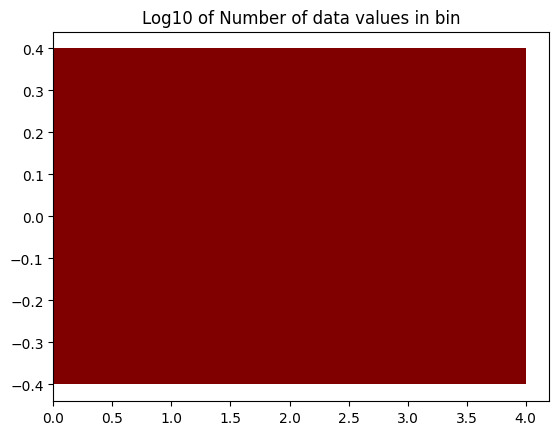

In [415]:
# fine-tune autoencoder
#batch 500


model_2 = Naive_DAE([48,250,100,16])

optimizer = optim.Adam(model_2.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d2_flat):
        model_2.train()
        data = data_list[0]
        v_pred = model_2(data)
        
        batch_loss = loss(data, v_pred) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_2[-size_test:,0:48]
    model_2.eval()
    test_pred = model_2(data_test)
    batch_test = loss(data_test, test_pred)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_2.eval()
AE_Stats.gen_all_stats(model_2(test),test,test_loc)


Epoch 0, lr 0.0045
Epoch 0: Train 35.00326610565185, Test 28.530372619628906
Epoch 1, lr 0.0045
Epoch 1: Train 21.45304117202759, Test 20.30438995361328
Epoch 2, lr 0.0045
Epoch 2: Train 15.80489424387614, Test 16.143617630004883
Epoch 3, lr 0.0045
Epoch 3: Train 12.47745122909546, Test 12.854053497314453
Epoch 4, lr 0.0045
Epoch 4: Train 10.126726525624592, Test 10.93253231048584
Epoch 5, lr 0.0045
Epoch 5: Train 8.978458938598633, Test 9.9406156539917
Epoch 6, lr 0.0045
Epoch 6: Train 8.38060248374939, Test 8.983002662658691
Epoch 7, lr 0.0045
Epoch 7: Train 7.648604831695557, Test 8.323759078979492
Epoch 8, lr 0.0045
Epoch 8: Train 7.349254007339478, Test 8.187385559082031
Epoch 9, lr 0.0045
Epoch 9: Train 7.25209612528483, Test 7.991302967071533
Epoch 10, lr 0.0045
Epoch 10: Train 6.87219487508138, Test 7.503111839294434
Epoch 11, lr 0.0045
Epoch 11: Train 6.670633071263631, Test 7.5554609298706055
Epoch 12, lr 0.0045
Epoch 12: Train 6.627833350499471, Test 7.138227462768555
Epoch 

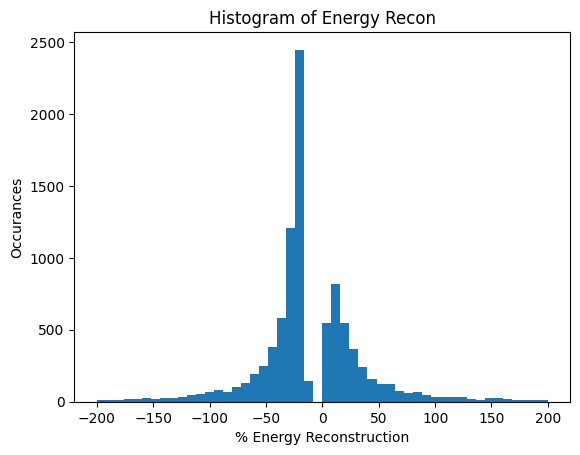

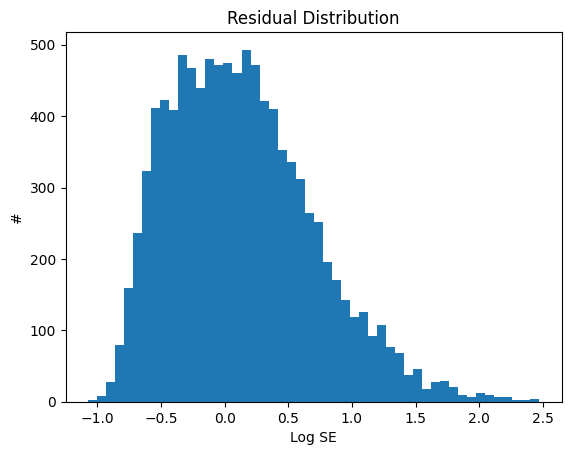

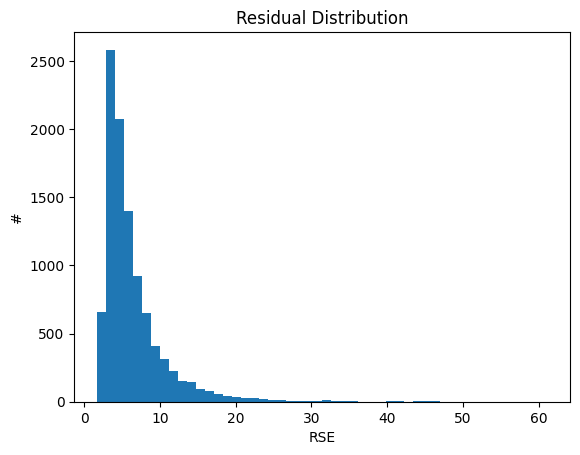

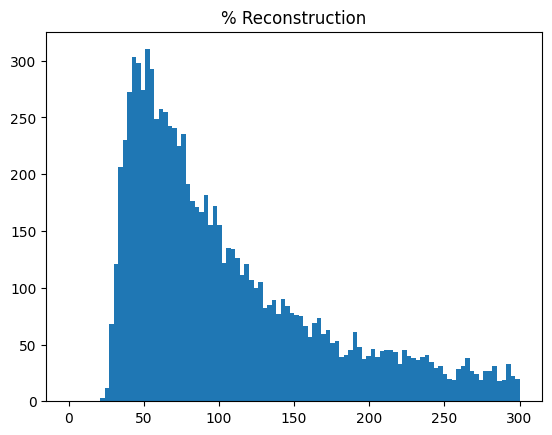

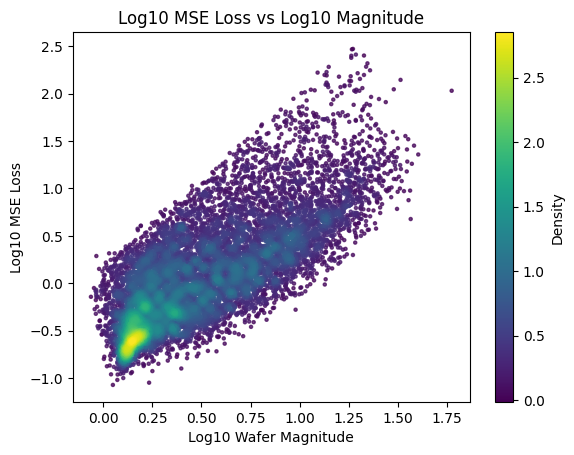

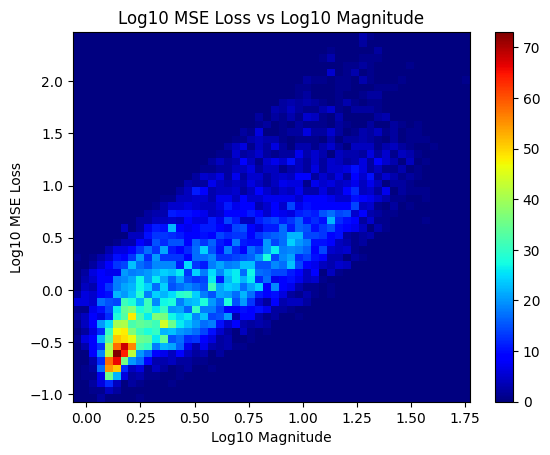

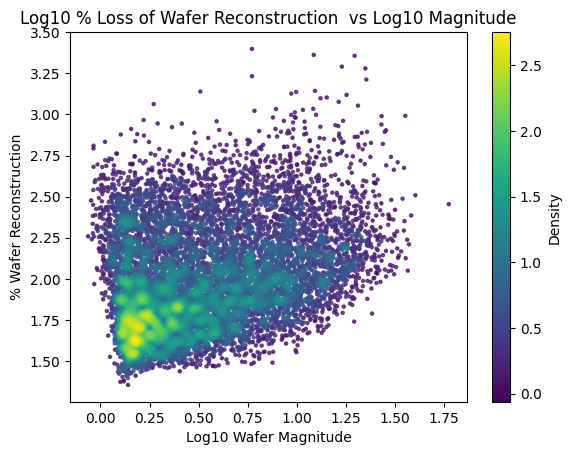

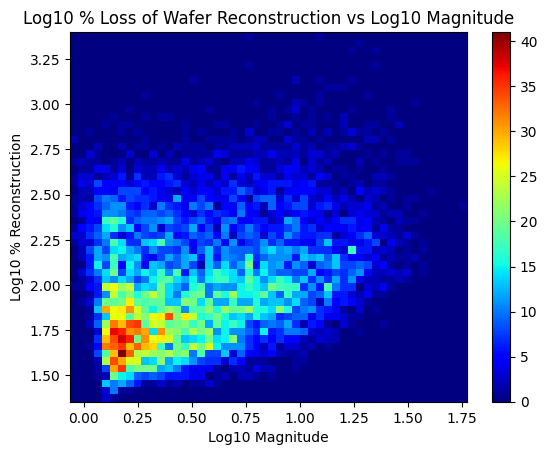

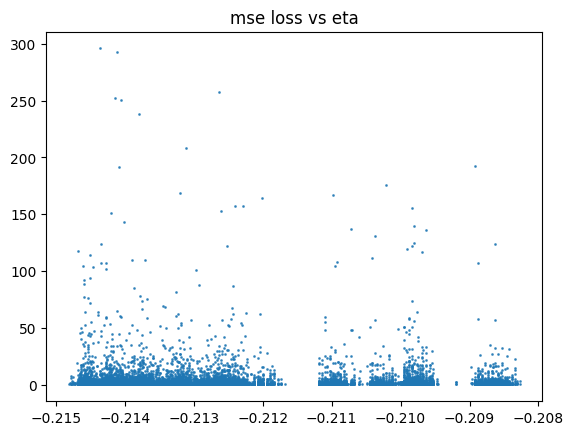

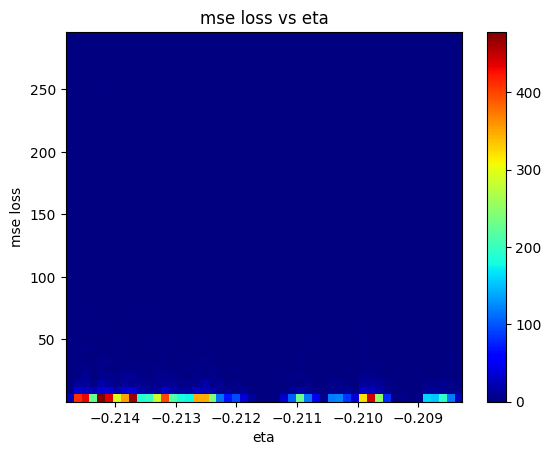

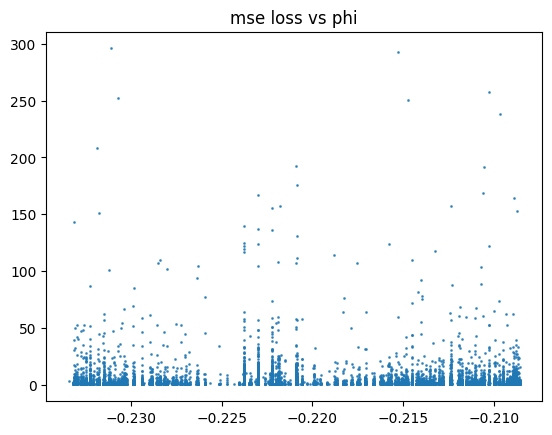

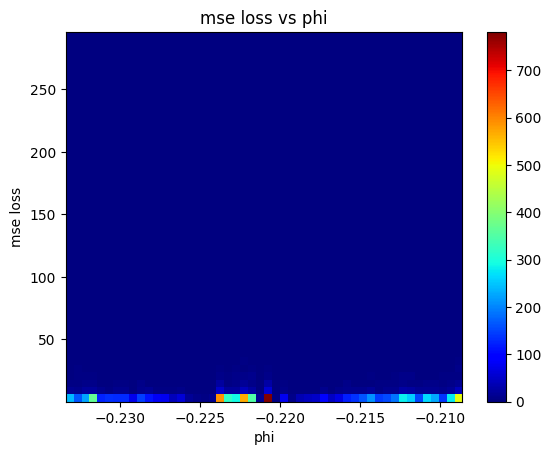

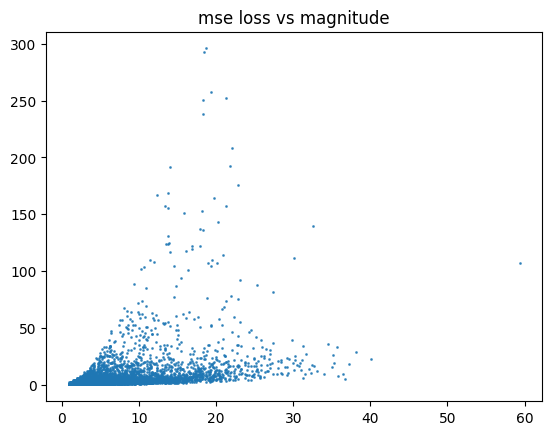

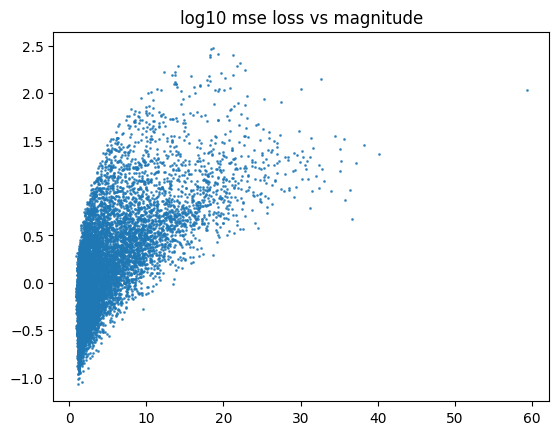

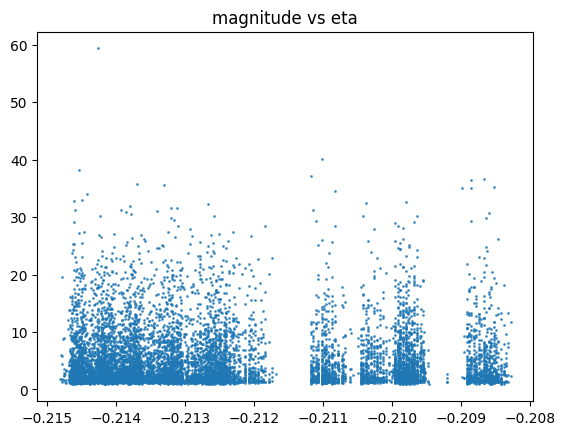

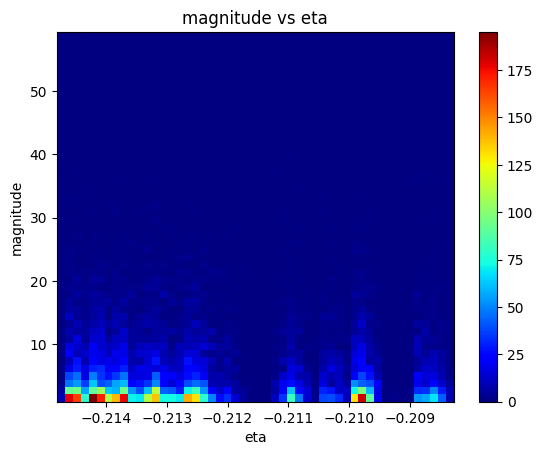

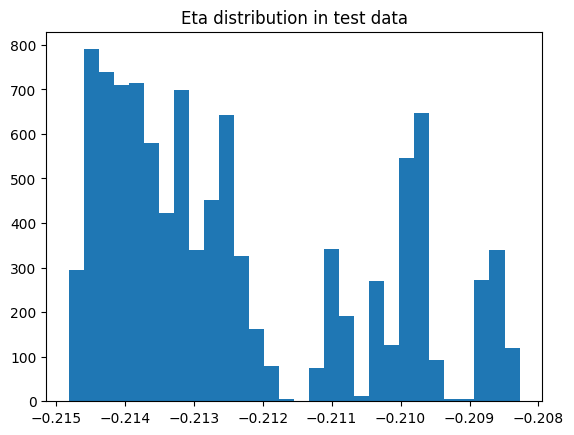

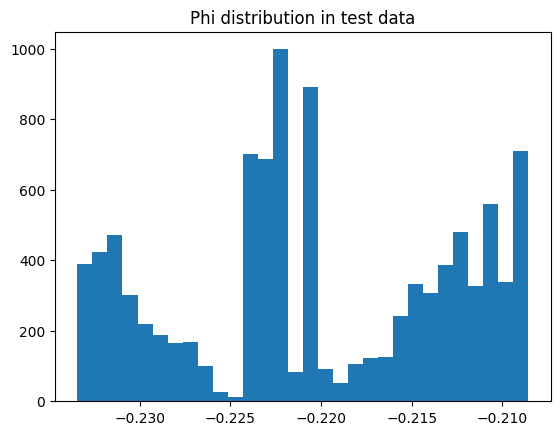

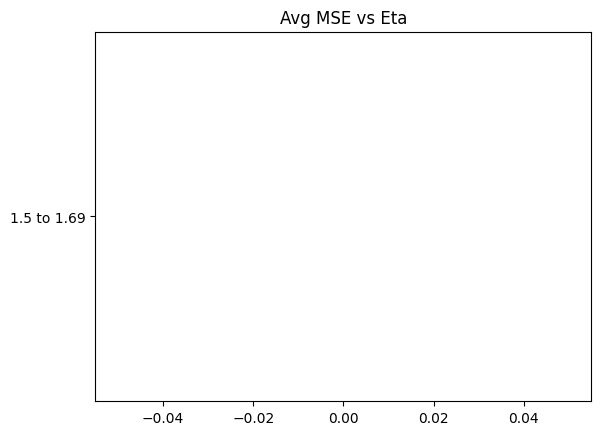

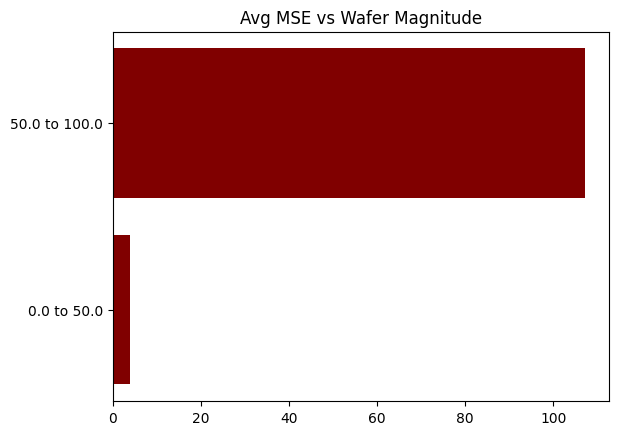

tensor([[-0.2145, -0.2178,  1.6294,  0.2785,  3.0947],
        [-0.2137, -0.2327,  2.6502,  5.1864,  7.4649],
        [-0.2132, -0.2099,  5.0999,  7.1776, 10.5046],
        ...,
        [-0.2131, -0.2312,  2.8470,  5.3305,  9.2282],
        [-0.2134, -0.2288,  2.0111,  4.3713,  8.7302],
        [-0.2144, -0.2140,  1.6086,  0.3889,  3.6915]], grad_fn=<CatBackward0>)

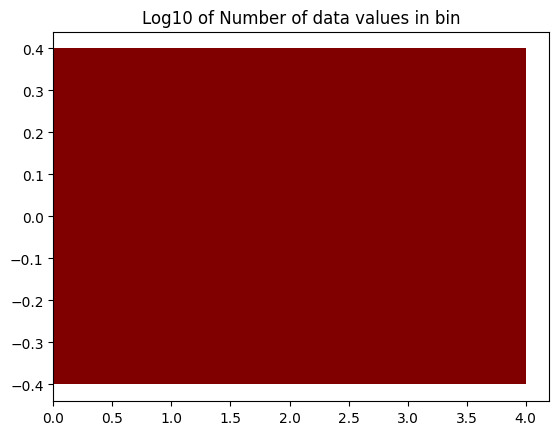

In [416]:
# fine-tune autoencoder
#batch 500


model_3 = Naive_DAE([48,250,100,16])

optimizer = optim.Adam(model_3.parameters(), lr,weight_decay=5e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor = 0.5)

all_test_losses = []
all_train_losses = []
# train
running_loss = float("inf")
for epoch in range(num_epochs):
    
    losses = []
    
    for i, data_list in enumerate(train_d3_flat):
        model_3.train()
        data = data_list[0]
        v_pred = model_3(data)
        
        batch_loss = loss(data, v_pred) # difference between actual and reconstructed   
        
        
        all_train_losses.append(batch_loss.item())
        losses.append(batch_loss.item())
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    scheduler.step(batch_loss)
    data_test = dt_3[-size_test:,0:48]
    model_3.eval()
    test_pred = model_3(data_test)
    batch_test = loss(data_test, test_pred)
    running_loss = np.mean(losses)
    running_test_loss = batch_test.item()
    print('Epoch {}, lr {}'.format(
        epoch, optimizer.param_groups[0]['lr']))
    
    print(f"Epoch {epoch}: Train {running_loss}, Test {running_test_loss}")
model_3.eval()
AE_Stats.gen_all_stats(model_3(test),test,test_loc)


In [36]:
import numpy as np
from scipy.stats import binned_statistic
import torch
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax